In [1]:
import numpy as np
import pandas as pd
import warnings
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("global_superstore_2016.xlsx")
df=df[['Order Date','Sales']]
df.head()

,Order Date,Sales
0,2014-11-11,221.980
1,2014-02-05,3709.395
2,2014-10-17,5175.171
3,2014-01-28,2892.510
4,2014-11-05,2832.960


In [3]:

df['Year']=df['Order Date'].dt.year
df['Month']=df['Order Date'].dt.month
sales_data=pd.DataFrame(df.groupby(['Year','Month'])['Sales'].sum())
sales_data.head()

Sales
Year Month              
2012 1       98898.48886
     2      103717.92328
     3      135746.40206
     4      114332.96318
     5      158228.32880

In [4]:
date = pd.date_range(start='1/1/2012',periods=len(sales_data), freq='M')
date

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [5]:
sales_data['Time_Stamp'] = date
sales_data.head()

Sales Time_Stamp
Year Month                         
2012 1       98898.48886 2012-01-31
     2      103717.92328 2012-02-29
     3      135746.40206 2012-03-31
     4      114332.96318 2012-04-30
     5      158228.32880 2012-05-31

In [6]:
sales_data.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
sales_data.head()

,Sales
Time_Stamp,
2012-01-31,98898.48886
2012-02-29,103717.92328
2012-03-31,135746.40206
2012-04-30,114332.96318
2012-05-31,158228.32880


In [7]:
sales_data.describe()

,Sales
count,48.000000
mean,263385.456456
std,113156.113781
min,98854.962080
25%,175175.900230
50%,254557.774310
75%,324256.510015
max,555279.027000


<AxesSubplot:xlabel='Time_Stamp'>

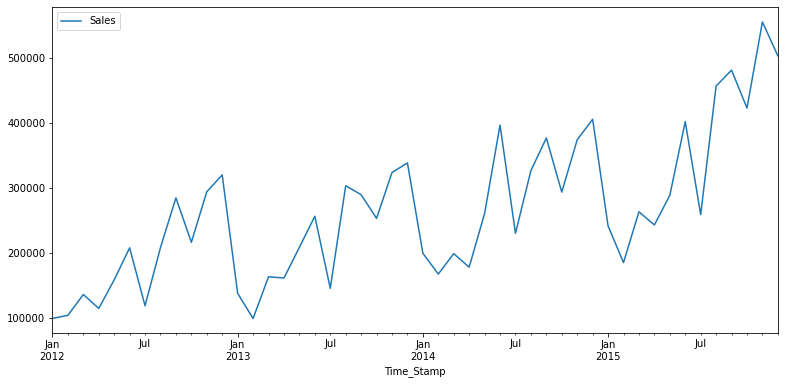

In [8]:
sales_data.plot()

In [9]:
ts=sales_data.copy()

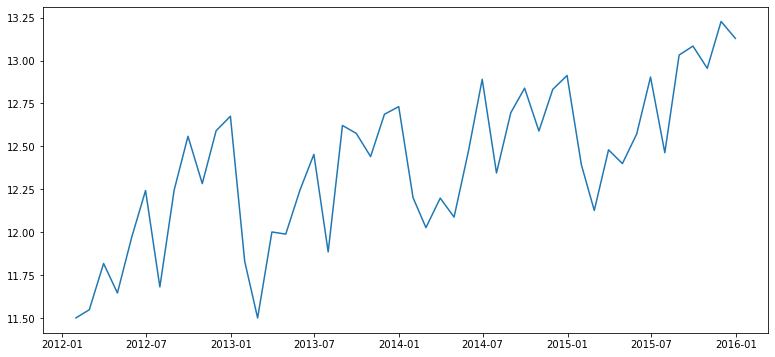

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)

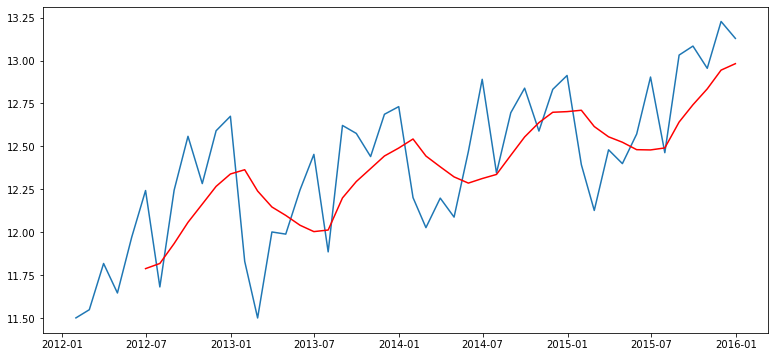

In [11]:
moving_avg = ts_log.rolling(window=6).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

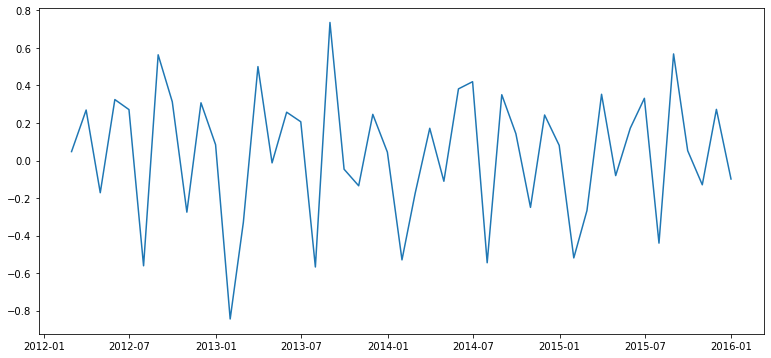

In [12]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

In [13]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
ts_log_diff.dropna(inplace=True)

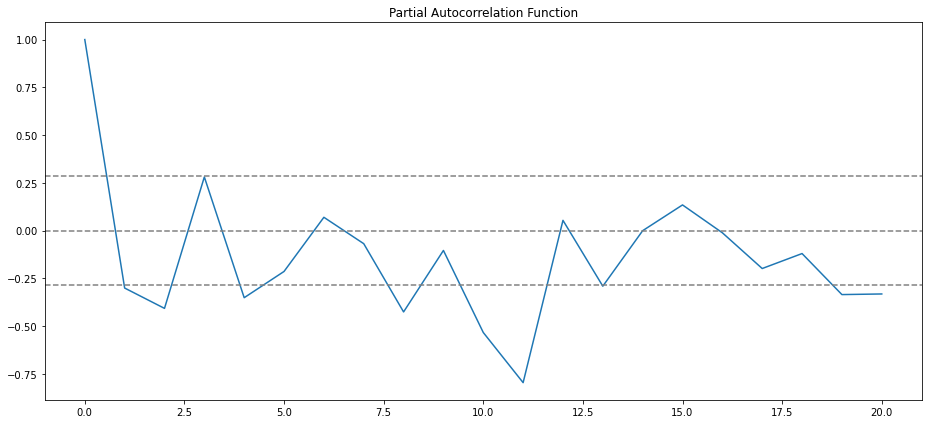

In [14]:
#Plotting PACF
lag_pacf=pacf(ts_log_diff,nlags=20,method='ols')
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

Text(0.5, 1.0, 'Autocorrelation Function')

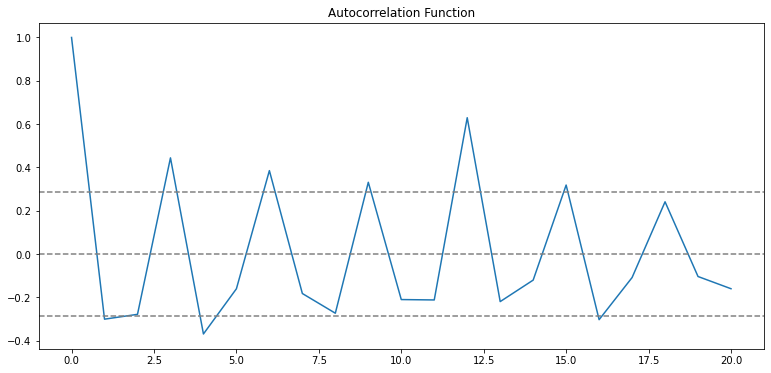

In [15]:
lag_acf = acf(ts_log_diff, nlags=20)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [16]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
from sklearn.metrics import mean_absolute_percentage_error

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


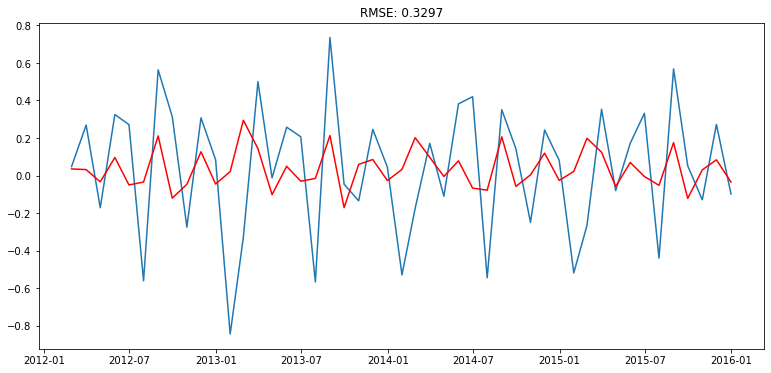

In [18]:
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_AR.fittedvalues-ts_log_diff.values.reshape(-1))**2)/len(ts)))
plt.show()

In [19]:
predictions_AR_diff = pd.Series(results_AR.fittedvalues, copy=True)
print(predictions_AR_diff.head())

Time_Stamp
2012-02-29    0.035201
2012-03-31    0.031549
2012-04-30   -0.033793
2012-05-31    0.096220
2012-06-30   -0.050255
dtype: float64


In [20]:
predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()
print(predictions_AR_diff_cumsum.head())

Time_Stamp
2012-02-29    0.035201
2012-03-31    0.066750
2012-04-30    0.032957
2012-05-31    0.129176
2012-06-30    0.078921
dtype: float64


In [21]:
predictions_AR_log = pd.Series(ts_log['Sales'].iloc[0], index=ts_log.index)
predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)
predictions_AR_log.head()

Time_Stamp
2012-01-31    11.501849
2012-02-29    11.537050
2012-03-31    11.568599
2012-04-30    11.534806
2012-05-31    11.631026
dtype: float64

Text(0.5, 1.0, 'RMSE: 98753.7898')

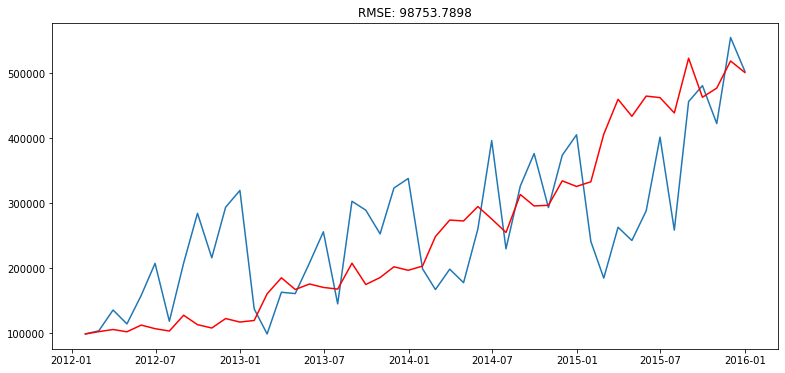

In [22]:
predictions_AR = np.exp(predictions_AR_log)
plt.plot(ts)
plt.plot(predictions_AR,color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_AR-ts.values.reshape(-1))**2)/len(ts)))

In [23]:
df_predictions_AR =pd.DataFrame(predictions_AR, columns=['AR Predicted Values'])
pd.concat([ts,df_predictions_AR],axis =1).T

Time_Stamp,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,...,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31
Sales,98898.48886,103717.923280,135746.402060,114332.963180,158228.328800,207571.543520,118434.884620,208063.283720,284587.748460,216114.567480,...,263100.772620,242771.861300,288401.046140,401814.063100,258705.680480,456619.942360,481157.243700,422766.629160,555279.027000,503143.693480
AR Predicted Values,98898.48886,102441.790922,105725.266903,102212.151979,112535.678922,107019.948834,103392.932272,127692.373797,113182.963731,108008.390349,...,460090.504666,433923.851922,465062.349908,462642.503444,439096.606918,523308.882896,463206.378104,477382.164386,519081.295255,501309.634809


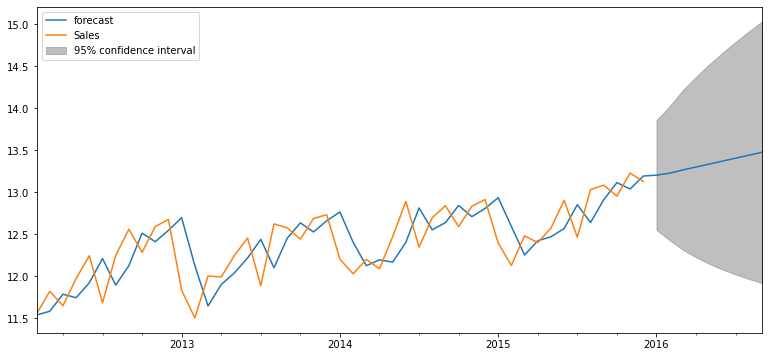

In [24]:
results_AR.plot_predict(start = 1, end= 56)
plt.legend(loc='upper left')

In [25]:
forecast_values_log_scale = results_AR.forecast(steps = 8)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("2016-01-01", "2016-08-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,542148.812805
1,2016-02-01,555073.845158
2,2016-03-01,576938.274559
3,2016-04-01,597003.742666
4,2016-05-01,618577.734316
5,2016-06-01,640683.482275
6,2016-07-01,663654.922240
7,2016-08-01,687426.860276


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


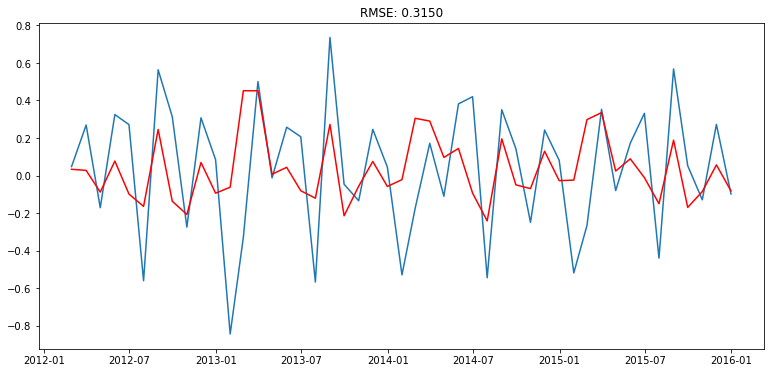

In [26]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_MA.fittedvalues-ts_log_diff.values.reshape(-1))**2)/len(ts)))
plt.show()

In [27]:
predictions_MA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print(predictions_MA_diff.head())

Time_Stamp
2012-02-29    0.033271
2012-03-31    0.027317
2012-04-30   -0.088388
2012-05-31    0.077096
2012-06-30   -0.098739
dtype: float64


In [28]:
predictions_MA_diff_cumsum = predictions_MA_diff.cumsum()
print(predictions_MA_diff_cumsum.head())

Time_Stamp
2012-02-29    0.033271
2012-03-31    0.060588
2012-04-30   -0.027800
2012-05-31    0.049297
2012-06-30   -0.049443
dtype: float64


In [29]:
predictions_MA_log = pd.Series(ts_log['Sales'].iloc[0], index=ts_log.index)
predictions_MA_log = predictions_MA_log.add(predictions_MA_diff_cumsum,fill_value=0)
predictions_MA_log.head()

Time_Stamp
2012-01-31    11.501849
2012-02-29    11.535120
2012-03-31    11.562438
2012-04-30    11.474050
2012-05-31    11.551146
dtype: float64

Text(0.5, 1.0, 'RMSE: 124953.6045')

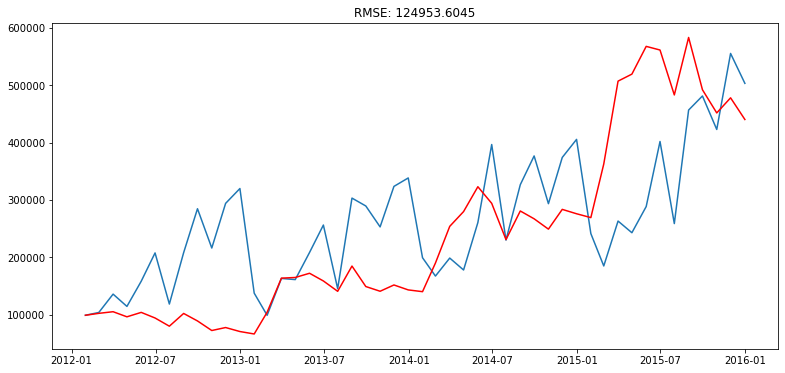

In [30]:
predictions_MA = np.exp(predictions_MA_log)
plt.plot(ts)
plt.plot(predictions_MA,color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_MA-ts.values.reshape(-1))**2)/len(ts)))

In [31]:
df_predictions_MA =pd.DataFrame(predictions_MA, columns=['MA Predicted Values'])
pd.concat([ts,df_predictions_MA],axis =1).T

Time_Stamp,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,...,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31
Sales,98898.48886,103717.923280,135746.40206,114332.963180,158228.328800,207571.543520,118434.88462,208063.283720,284587.748460,216114.567480,...,263100.772620,242771.861300,288401.046140,401814.063100,258705.680480,456619.942360,481157.243700,422766.629160,555279.027000,503143.693480
MA Predicted Values,98898.48886,102244.295755,105075.83924,96187.009521,103896.033586,94127.606287,79842.77940,102052.109347,88991.045922,72303.636889,...,507035.202628,519247.086753,567608.201852,561258.420863,482954.697093,583145.666072,492012.117959,451602.106905,477922.150035,440144.573881


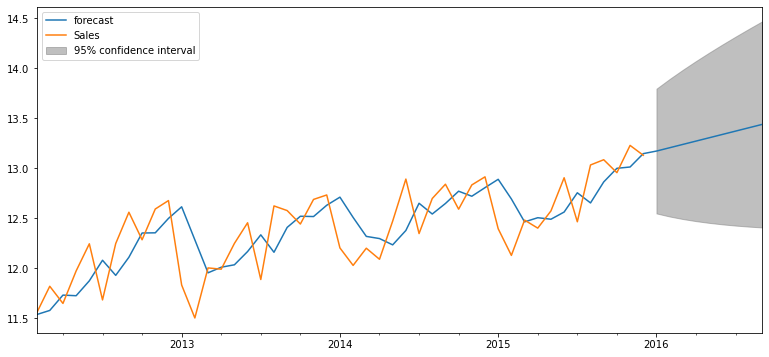

In [32]:
results_MA.plot_predict(start = 1, end= 56)
plt.legend(loc='upper left')

In [33]:
forecast_values_log_scale = results_MA.forecast(steps = 8)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("2016-01-01", "2016-08-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,524709.512984
1,2016-02-01,542460.812592
2,2016-03-01,560812.651412
3,2016-04-01,579785.346117
4,2016-05-01,599399.900708
5,2016-06-01,619678.029766
6,2016-07-01,640642.182491
7,2016-08-01,662315.567556


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


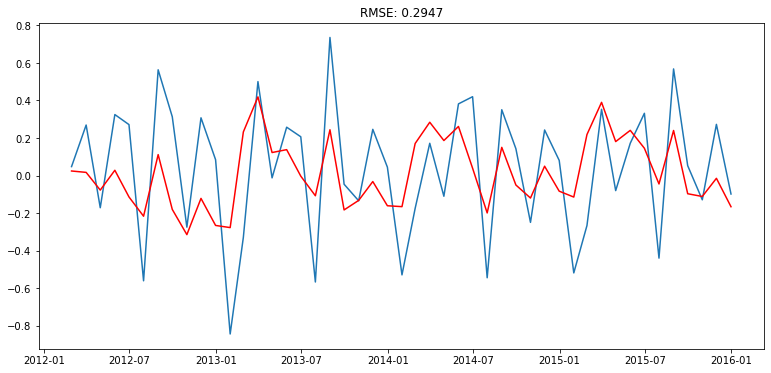

In [34]:
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((results_ARIMA.fittedvalues-ts_log_diff.values.reshape(-1))**2)/len(ts)))
plt.show()

In [35]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Time_Stamp
2012-02-29    0.024131
2012-03-31    0.016708
2012-04-30   -0.077694
2012-05-31    0.028045
2012-06-30   -0.114173
dtype: float64


In [36]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Time_Stamp
2012-02-29    0.024131
2012-03-31    0.040839
2012-04-30   -0.036855
2012-05-31   -0.008811
2012-06-30   -0.122984
dtype: float64


In [37]:
predictions_ARIMA_log = pd.Series(ts_log['Sales'].iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Time_Stamp
2012-01-31    11.501849
2012-02-29    11.525980
2012-03-31    11.542688
2012-04-30    11.464994
2012-05-31    11.493039
dtype: float64

Text(0.5, 1.0, 'RMSE: 194824.8607')

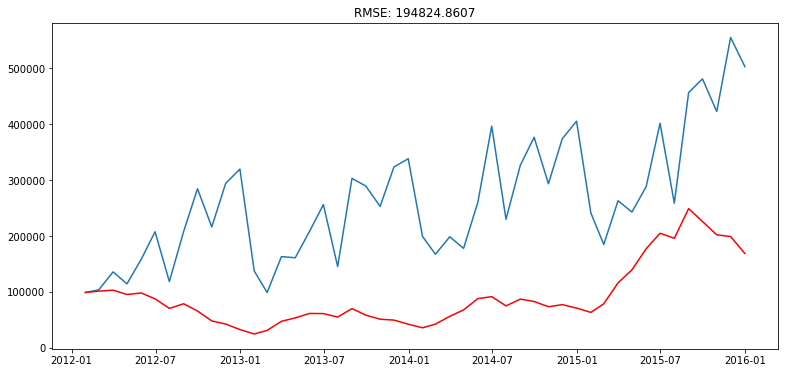

In [38]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA,color='red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts.values.reshape(-1))**2)/len(ts)))

In [39]:
df_predictions =pd.DataFrame(predictions_ARIMA, columns=['Predicted Values'])
pd.concat([ts,df_predictions],axis =1).T

Time_Stamp,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,...,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31
Sales,98898.48886,103717.923280,135746.402060,114332.963180,158228.328800,207571.54352,118434.884620,208063.283720,284587.748460,216114.567480,...,263100.772620,242771.861300,288401.046140,401814.063100,258705.680480,456619.942360,481157.243700,422766.629160,555279.027000,503143.693480
Predicted Values,98898.48886,101314.011962,103021.001465,95319.891099,98030.950804,87453.73355,70403.288749,78702.137211,65694.710389,47941.493825,...,116220.258657,139262.346689,177162.389267,204873.979597,195854.476573,248988.381219,225948.387371,202064.068815,199071.759561,168576.702298


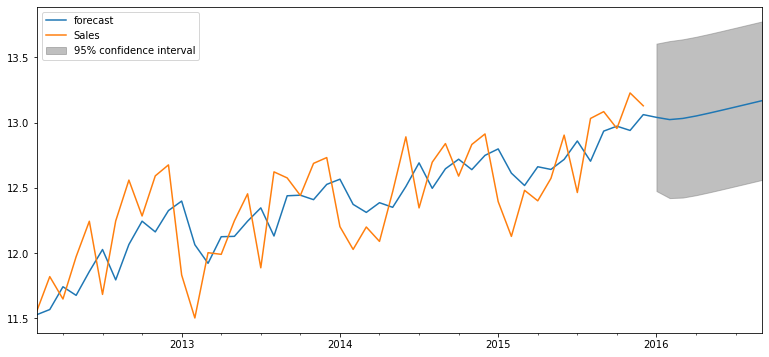

In [40]:
results_ARIMA.plot_predict(start = 1, end= 56)
plt.legend(loc='upper left')

In [41]:
forecast_values_log_scale = results_ARIMA.forecast(steps = 8)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("2016-01-01", "2016-08-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,460490.989872
1,2016-02-01,452625.162839
2,2016-03-01,456696.150603
3,2016-04-01,465252.367393
4,2016-05-01,475642.821486
5,2016-06-01,486894.802385
6,2016-07-01,498649.622101
7,2016-08-01,510777.197766


In [95]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(ts_log, m=12)
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                  24.186
Date:                            Mon, 13 Sep 2021   AIC                            -34.372
Time:                                    16:21:11   BIC                            -21.421
Sample:                                         0   HQIC                           -29.499
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.270      0.787      -0.001       0.001
ar.L1          0.3877      0.208      1.862      0.063      -0.020       0.796
ar.L2         -0.1801      0.168     -1.075      0.283      -0.508       0.148
ma.L1         -0.9755      0.089    -10.963      0.000      -1.150      -0.801
ar.S.L12       0.9921      0.029     33.812      0.000       0.935       1.050
ma.S.L12      -0.6497      0.589     -1.104      0.270      -1.804       0.504
sigma2         0.0103      0.005      2.018      0.044       0.000       0.020
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.74   Prob(JB):                         0.64
Heteroskedasticity (H):               0.31   Skew:                            -0.34
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
forecast_date_range= pd.date_range("2016-01-01", "2016-12-01", freq="MS")

In [101]:
fc, conf=stepwise_model.fit_predict(ts_log,n_periods=12,alpha=0.05,return_conf_int=True)
# Make as pandas series
fc_series = pd.Series(fc,index=forecast_date_range)
lower_series = pd.Series(conf[:, 0],index=forecast_date_range)
upper_series = pd.Series(conf[:, 1],index=forecast_date_range)

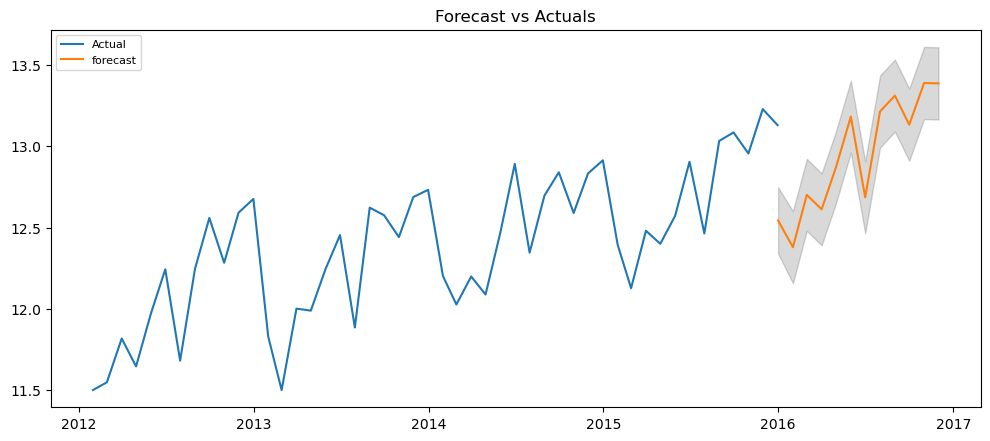

In [102]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(ts_log, label='Actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [103]:
forecast_values_original_scale = np.exp(fc)

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,280301.430425
1,2016-02-01,237741.573682
2,2016-03-01,327846.524366
3,2016-04-01,300051.602688
4,2016-05-01,388566.400763
5,2016-06-01,530315.210416
6,2016-07-01,322959.339296
7,2016-08-01,547181.778691
8,2016-09-01,603220.839382
9,2016-10-01,504526.943075


In [106]:
df = pd.read_excel("global_superstore_2016.xlsx")
df=df[['Order Date','Category','Sales']]
df.head()

,Order Date,Category,Sales
0,2014-11-11,Technology,221.980
1,2014-02-05,Furniture,3709.395
2,2014-10-17,Technology,5175.171
3,2014-01-28,Technology,2892.510
4,2014-11-05,Technology,2832.960


In [107]:
tech=df[df['Category']=='Technology'].drop('Category',axis=1)
tech.head()

,Order Date,Sales
0,2014-11-11,221.980
2,2014-10-17,5175.171
3,2014-01-28,2892.510
4,2014-11-05,2832.960
5,2014-06-28,2862.675


In [110]:
tech['Year']=tech['Order Date'].dt.year
tech['Month']=tech['Order Date'].dt.month
tech_sales_data=pd.DataFrame(tech.groupby(['Year','Month'])['Sales'].sum())
tech_sales_data.head()

Sales
Year Month             
2012 1      30908.00836
     2      41783.50648
     3      63890.56666
     4      38080.75118
     5      58728.18520

In [111]:
date = pd.date_range(start='1/1/2012',periods=len(sales_data), freq='M')
date

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [112]:
tech_sales_data['Time_Stamp'] = date
tech_sales_data.head()

Sales Time_Stamp
Year Month                        
2012 1      30908.00836 2012-01-31
     2      41783.50648 2012-02-29
     3      63890.56666 2012-03-31
     4      38080.75118 2012-04-30
     5      58728.18520 2012-05-31

In [113]:
tech_sales_data.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
tech_sales_data.head()

,Sales
Time_Stamp,
2012-01-31,30908.00836
2012-02-29,41783.50648
2012-03-31,63890.56666
2012-04-30,38080.75118
2012-05-31,58728.18520


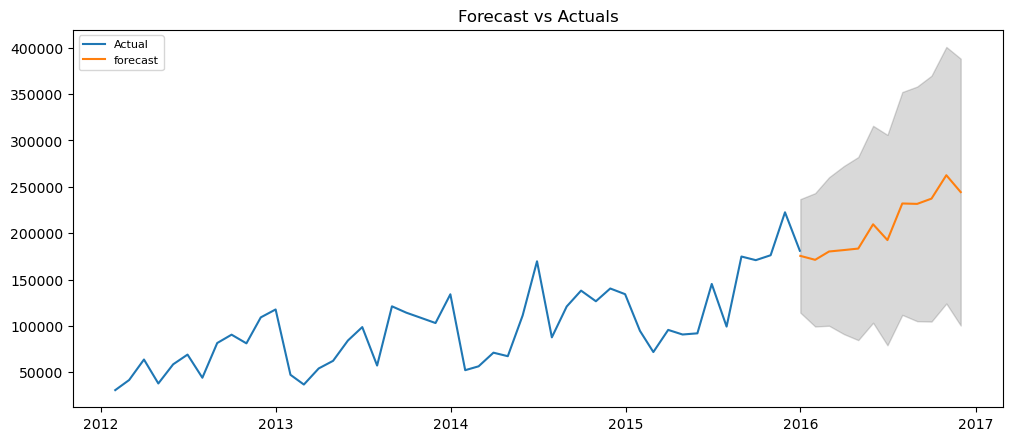

In [114]:
fc, conf=stepwise_model.fit_predict(tech_sales_data,n_periods=12,alpha=0.05,return_conf_int=True)
# Make as pandas series
fc_series = pd.Series(fc,index=forecast_date_range)
lower_series = pd.Series(conf[:, 0],index=forecast_date_range)
upper_series = pd.Series(conf[:, 1],index=forecast_date_range)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(tech_sales_data, label='Actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [115]:
forecast_values_original_scale = fc

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,175601.455021
1,2016-02-01,171355.548540
2,2016-03-01,180326.571498
3,2016-04-01,181869.730783
4,2016-05-01,183479.802981
5,2016-06-01,209655.113077
6,2016-07-01,192623.945790
7,2016-08-01,232084.061143
8,2016-09-01,231646.399674
9,2016-10-01,237306.614997


In [108]:
office=df[df['Category']=='Office Supplies'].drop('Category',axis=1)
office.head()

,Order Date,Sales
10,2012-03-06,17.940
14,2014-06-06,3701.520
15,2015-07-31,1869.588
16,2012-02-19,12.624
17,2015-09-08,7958.580


In [116]:
office['Year']=office['Order Date'].dt.year
office['Month']=office['Order Date'].dt.month
office_sales_data=pd.DataFrame(office.groupby(['Year','Month'])['Sales'].sum())
office_sales_data.head()

Sales
Year Month            
2012 1      33526.7275
     2      26135.0293
     3      31578.5606
     4      45562.6669
     5      49731.4716

In [117]:
office_sales_data['Time_Stamp'] = date
office_sales_data.head()

Sales Time_Stamp
Year Month                       
2012 1      33526.7275 2012-01-31
     2      26135.0293 2012-02-29
     3      31578.5606 2012-03-31
     4      45562.6669 2012-04-30
     5      49731.4716 2012-05-31

In [118]:
office_sales_data.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
office_sales_data.head()

,Sales
Time_Stamp,
2012-01-31,33526.7275
2012-02-29,26135.0293
2012-03-31,31578.5606
2012-04-30,45562.6669
2012-05-31,49731.4716


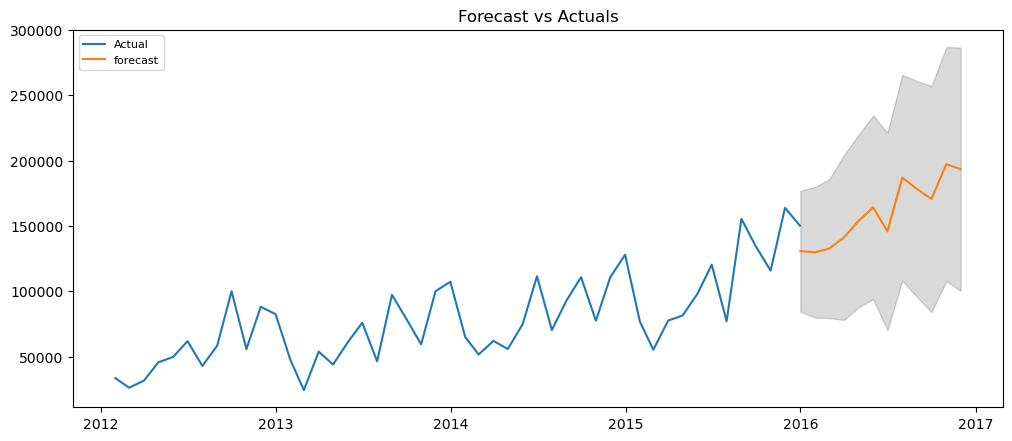

In [119]:
fc, conf=stepwise_model.fit_predict(office_sales_data,n_periods=12,alpha=0.05,return_conf_int=True)
# Make as pandas series
fc_series = pd.Series(fc,index=forecast_date_range)
lower_series = pd.Series(conf[:, 0],index=forecast_date_range)
upper_series = pd.Series(conf[:, 1],index=forecast_date_range)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(office_sales_data, label='Actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [120]:
forecast_values_original_scale = fc

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,130677.524454
1,2016-02-01,129819.803301
2,2016-03-01,132586.945480
3,2016-04-01,141062.735748
4,2016-05-01,153554.446014
5,2016-06-01,164236.322535
6,2016-07-01,145826.495740
7,2016-08-01,186860.016914
8,2016-09-01,178178.611082
9,2016-10-01,170648.482377


In [109]:
furni=df[df['Category']=='Furniture'].drop('Category',axis=1)
furni.head()

,Order Date,Sales
1,2014-02-05,3709.395
6,2012-11-06,1822.080
7,2013-04-14,5244.840
8,2014-11-11,341.960
9,2012-03-06,48.712


In [121]:
furni['Year']=furni['Order Date'].dt.year
furni['Month']=furni['Order Date'].dt.month
furni_sales_data=pd.DataFrame(furni.groupby(['Year','Month'])['Sales'].sum())
furni_sales_data.head()

Sales
Year Month            
2012 1      34463.7530
     2      35799.3875
     3      40277.2748
     4      30689.5451
     5      49768.6720

In [122]:
furni_sales_data['Time_Stamp'] = date
furni_sales_data.head()

Sales Time_Stamp
Year Month                       
2012 1      34463.7530 2012-01-31
     2      35799.3875 2012-02-29
     3      40277.2748 2012-03-31
     4      30689.5451 2012-04-30
     5      49768.6720 2012-05-31

In [123]:
furni_sales_data.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
furni_sales_data.head()

,Sales
Time_Stamp,
2012-01-31,34463.7530
2012-02-29,35799.3875
2012-03-31,40277.2748
2012-04-30,30689.5451
2012-05-31,49768.6720


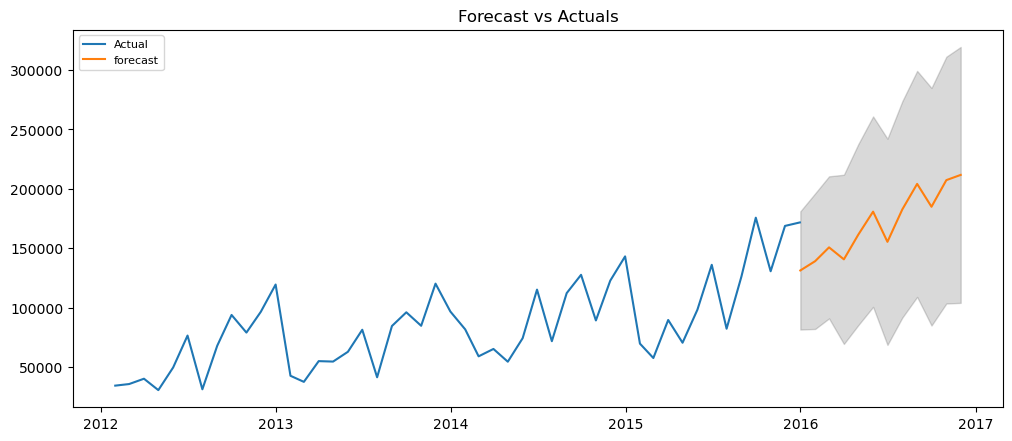

In [124]:
fc, conf=stepwise_model.fit_predict(furni_sales_data,n_periods=12,alpha=0.05,return_conf_int=True)
# Make as pandas series
fc_series = pd.Series(fc,index=forecast_date_range)
lower_series = pd.Series(conf[:, 0],index=forecast_date_range)
upper_series = pd.Series(conf[:, 1],index=forecast_date_range)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(furni_sales_data, label='Actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [125]:
forecast_values_original_scale = fc

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Time'] = forecast_date_range

df_forecast[['Time', 'Forecast']]

,Time,Forecast
0,2016-01-01,131371.107081
1,2016-02-01,139194.781906
2,2016-03-01,150793.559645
3,2016-04-01,140714.207956
4,2016-05-01,161434.870754
5,2016-06-01,180851.858923
6,2016-07-01,155457.181647
7,2016-08-01,182693.222845
8,2016-09-01,204195.007931
9,2016-10-01,184970.464250
